<h1><center>Drug Prediction</center></h1>

<p>I'm trying to predict the effective drug in use using the decision tree algorthm in this notebook.</p>
<p>The dataset contains details of patients and the drug which was effective for them.</p>
<sub>** for successful import you need to make sure to install pydotplus and graphviz **</sub>

<b>Import required library</b>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


<b>Load data set</b>

In [44]:
data = pd.read_csv('drug.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


There are two numerical fields age and Na_to_K in the dataset. All other variables are categorical. Let's transform the categorical variables into numericals by labeling each for ease of process. For that we will be using preprocessing function of sklearn library.

<p>First let's start with transforming the variable sex in the dataset.</p>

In [45]:
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [46]:
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
data.Sex = sex.transform(data.Sex)


Now let's traansform BP and then cholestrol.

In [47]:
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [48]:
bp = preprocessing.LabelEncoder()
bp.fit(['HIGH', 'LOW', 'NORMAL'])
data.BP = bp.transform(data.BP)

In [49]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [50]:
chol = preprocessing.LabelEncoder()
chol.fit(['HIGH', 'NORMAL'])
data.Cholesterol = chol.transform(data.Cholesterol) 
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Split the dataset into feature and target values(X and Y)

In [51]:
X = data[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y = data[['Drug']] # Dependent variable

<b>Split the data into training and testing sets</b>

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<b>Create a Linear Regression model</b>

<h5>criterion</h5>
There are two methods to measure the quality of a split at each node in decision tree. There are two main criteria commonly used: "gini" and "entropy."

<i>Gini</i>
- Gini impurity is the measure of how often a randomly chosen element would be incorrectly classified
- Gini impurity 0 means all elements are classified perfectly (pure node)
- Gini impurity of 0.5 means the node is equally split

<i>Entropy</i>
- Entropy is a measure of impurity that comes from information theory.
- It shows the amount of disordered information: lower the entropy, purer is the node.

In our case we are using entropy to measure the impurity.

<h5>max_width</h5>
max_width is the parameter used to set the maximum no of growth a tree can achieve. This is set to prevent overfitting by limiting the complexity of the tree.

In [53]:
algo = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

<b>Train the model</b>

In [54]:
algo.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Now let's predicted the outcome of testing set

In [55]:
pred = algo.predict(X_test)
pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA'], dtype=object)

Now let's check the accuracy of model using predicted and actual values.

In [56]:
acc = metrics.accuracy_score(Y_test, pred)
print("Decision Trees's Accuracy: ", acc)

Decision Trees's Accuracy:  0.9666666666666667


The above result indicates that the model is having 96% accuracy which is  not bad.

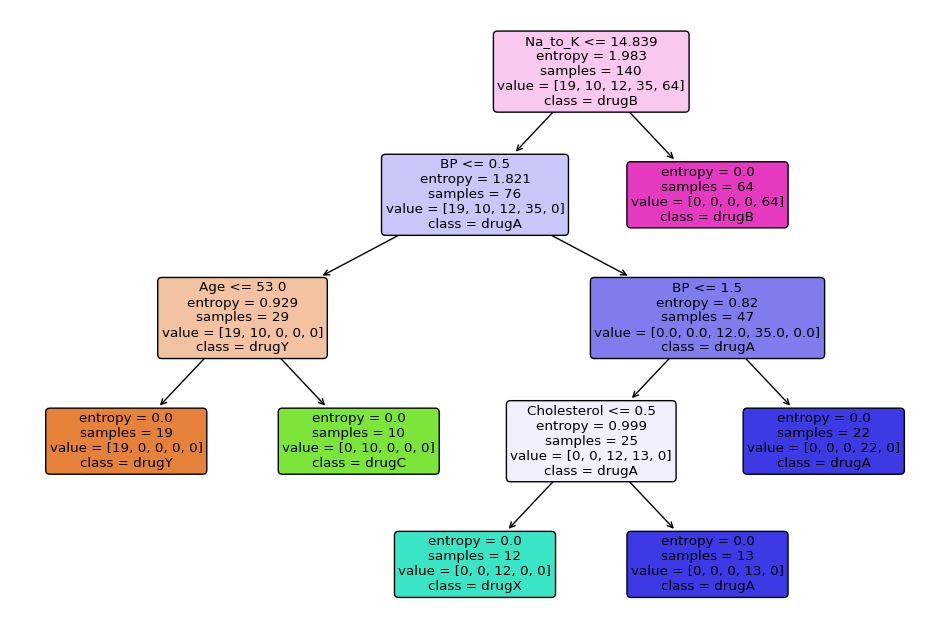

In [57]:
feature_names = data.columns.tolist()
feature_names.remove('Drug')
plt.figure(figsize=(12, 8))
plot_tree(algo, feature_names=feature_names, class_names=data['Drug'].unique(), filled=True, rounded=True)
plt.show()

Let's check the confusion matrix of algorithm

In [58]:
conf_matrix = confusion_matrix(Y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


Calculate and print classification report

In [59]:
class_report = classification_report(Y_test, pred, target_names=data['Drug'].unique())
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       drugY       0.67      1.00      0.80         4
       drugC       1.00      0.67      0.80         6
       drugX       1.00      1.00      1.00         4
       drugA       1.00      1.00      1.00        19
       drugB       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60

